# Bivariate analysis
In the last notebook, we've discussed univariate analysis, which is the study of one data column. We didn't get enough usefull information, however, we learned some basic concepts that will be usefull in the future.  
In this notebook, we'll discuss bivariate analysis which is the study of the relations between two variables. This is going to be very usefull for knowing the relations between each feature and the target variable for example.  
Let's get started

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", 100)

In [2]:
## loading the data
data = pd.read_csv("../data/housing.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Correlation coefficient
The correlation coefficient $R$ gives you an idea of how much two variables are __linearly__ correlated. The reason why I emphasize the word "linearly" is that some times two variables have a very obvious relation between them and yet $ R = 0 $  
$ -1 \leq R \leq 1 $ where positive correlation means that the higher the value of one variable is, the higher the value of the other. and negative correlation means that the higher the value of one variable is, the lower the value of the other. and zero correlation means there is no linear correlation between the two variables.
Let's assume we have two columns $ X and Y $
$$ R = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sigma_x * \sigma_y * N} $$  
  
  
$$ R = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2}\sum{(y_i - \bar{y})^2}}} $$
Where: 
- $ \bar{x} $ and $ \bar{y} $ are the means of X and Y respectively
- $ \sigma_x $ and $ \sigma_y $ are the standard deviations of X and Y respectively

In [3]:
## let's see the correlation between the lot area and the price of the house
lot_area = data["LotArea"]
price = data["SalePrice"]

# using pandas series
R_series = price.corr(lot_area)
print(R_series)
print()

# from scratch (kind of)
num_array = (lot_area.values - lot_area.mean()) * (price.values - price.mean())
den = lot_area.std() * price.std() * len(price)
R_scratch = num_array.sum() / den
print(R_scratch)
print()

0.2638433538714057

0.26366263924546635



### Correlation matrix
Let's now say that I want to get the correlation between multiple variables, each two at a time, do I have to calculate R for each pair?  
No!  
You can calculate the so called correlation matrix.  
let's say you have `n` columns, the correlation $C$ matrix is an `n x n` matrix where $C_{ij}$ is the correlation between the $i^{th} and j^{th}$ columns

In [4]:
## the correlation matrix
# using pandas

## create a dataframe of all the columns in which you are interested
interesting_data = data.copy()[["GrLivArea", "GarageArea", "SalePrice"]]
## get a new data frame with the correlation values
interesting_data.corr()

,GrLivArea,GarageArea,SalePrice
GrLivArea,1.000000,0.468997,0.708624
GarageArea,0.468997,1.000000,0.623431
SalePrice,0.708624,0.623431,1.000000


As you can see the main diagonal of the matrix only has values of 1 in it which is logical since each variable increases when it increases ... the sentence is weird but you know what I mean :D

### The purpose
Before we go any further, why should we even bother to get the linear correlation coeffecient?  
Let's say that you want to predict the price of the house using only a few features and using a model that can only fit a straight line through the data points (linear regression, if you know it), which features will you choose?  
That's right, the features with the highest correlation coeffecient values (either positive or negative). You can also use it to validate preprocessing techniques as we'll see later.

> **NOTE** Turns out there are three ways (as far as I know) to calculate the correlation coeffecient R
> - pearson (what we used and the default)
> - kendall
> - spearman
>
> You can choose which one you want to calculate by setting a parameter in the `corr` function  
> Search those terms if you want to know more

Usefull references:
- [pandas.Series.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html)
- [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)



### $R^2$ is even better (coeffecient of determination)
What is $ R^2 $? well, it's just $ R * R $  
The reason why this is better is that if $R^2$ is doubled this means that the actual correlation is doubled. allow me to explain.  
$ R = 0.7 $ is twice as good as $ R = 0.5 $ which is not obvious.
$ R^2= 0.49 $ is twice as good as $ R^2 = 0.25 $ ... that's better. same numbers, better interpretation.  
The problem with $R^2$ alone is that you don't know whether the correlation is positive or negative, but you can figure it out using $R$  
More information in [this video](https://www.youtube.com/watch?v=2AQKmw14mHM&ab_channel=StatQuestwithJoshStarmer)  
or [this video](https://www.youtube.com/watch?v=xZ_z8KWkhXE&ab_channel=StatQuestwithJoshStarmer) for correlation

### Visualizing correlation
In the previous notebook, we discussed how to visualize the distribution or frequency of one variable. Now let's see how we can visualize two variables togeather.  
The easiest way is to put one variable on the x axis and the other on the y axis and plot the points, this is called a scatter plot [matplotlib.pyplot.scatter](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html).

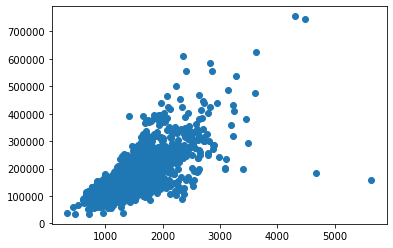

In [5]:
# let's try to scatter the GrLivArea (above ground living area) on the x axis and the price on the y axis
plt.scatter(data["GrLivArea"], data["SalePrice"])
plt.show()

The trend is obvious, however, there is some varience due to lack of information, because you cannot know the price just based on the GrLivArea, however, there seems to be a very strong correlation between the two.  

Let's fit a line through the data. Don't know how to do linear regression?? seaborn got your back.  
[seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)

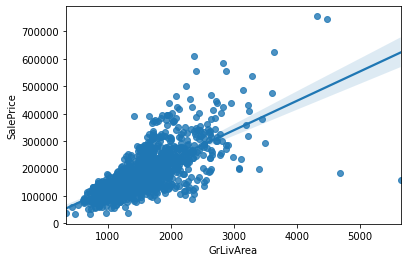

In [6]:
# the regression plot does two things, scatter the points and fits a line through them
sns.regplot(data["GrLivArea"], data["SalePrice"])
plt.show()

### Talking about different scales and relations
let's leave the data we have now for a while, since it is very linear if you ask me. I want to talk about the case where we have data that is correlated, however not linearly. Ideally you'd know that from the visualization. Let's talk about this case with an example and learn about some new functions in numpy for fun.  
- [numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
- [np.random.rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)

Let's say that we want to create a model that learns a quadratic equation $ y = cx^2 $, essentially we want it to figure out what `c` is. let's fake some data

In [7]:
x = np.linspace(-10, 10, 100)
y = 0.53 * x**2
y_with_noise = y + np.random.rand(*y.shape)*5.

In [8]:
## let's get R^2
R = np.corrcoef(x, y_with_noise)[0][1]
R_squared = R**2
print(R_squared)

0.00022777857760996654


So even though there is a direct relation between the two variables, the correlation coeffecient is close to zero, since the relation is not linear. Let's plot the data to know more.

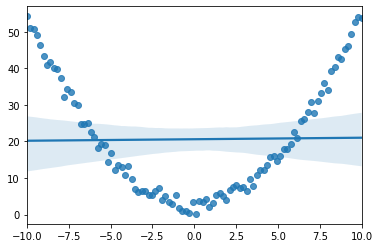

In [9]:
sns.regplot(x, y_with_noise)
plt.show()

#### Changing the scale
In these cases like when the target is a quadratic, logarithmic, trigonometric, or exponential function in one of the features, all you need to do is replace the feature with the function itself. let's see how

In [10]:
# change the scale
x_different_scale = x**2

# calculate R^2
R = np.corrcoef(x_different_scale, y_with_noise)[0][1]
R_squared = R**2
print(R_squared)

0.9923840193340254


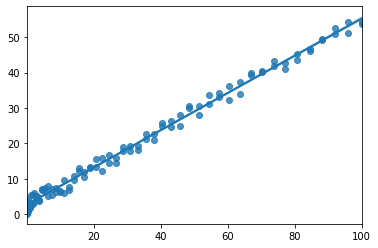

In [11]:
## R squared increased a lot
## now let's plot the data
sns.regplot(x_different_scale, y_with_noise)
plt.show()

This is a very usefull feature, however, in the case that you didn't visualize it, you would drop it depending on the very small value of $R^2$ ... this is one reason why visualization is important, and there are many cases in which you need to change the scale.  
### Standardization and Normalization
some linear models like SVMs like the scales of the features to be the same, which can be done by dividing the features by the corresponding maxima ... just a little piece of information on the side.
![SVMs with scaled data](https://image.slidesharecdn.com/5-180514114313/95/support-vector-machines-63-638.jpg?cb=1527755333)

$$ x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}} $$

$$ x_{standard} = \frac{x - \bar{x}}{\sigma_x} $$

## Correlation with categorical features
We have a very straight forward equation to calculate correlation metrics between two numerical variables, but how can we calculate the correlation between the categorical variables and the target?

Let's first understand the types of categorical variables since this is going to be important.
- Ordinal (has clear and obvious order e.g. \[very bad, bad, ok, good, very good\])
- Nominal (doesn't have any order e.g. \[beef, ham, bacon, burger, lamb\])
- Cyclic (months of the year or days of the week)

### Ordinal features
There is a very easy and straight forward way to calculate the correlation between ordinal features and the target, which is to simply replace each category with a number (this is called __ordinal encoding__) and then use the R^2 metric.  
let's choose a feature like overall quality of the house `OverallQual`

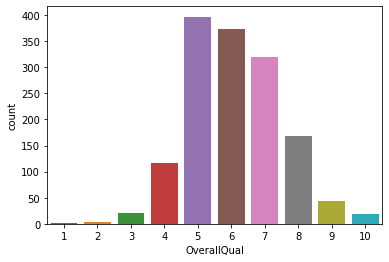

In [12]:
## first let's see the categories
sns.countplot(data["OverallQual"])
plt.show()

In [13]:
## it seems like it is already encoded and ready to be used in calculations
data[["OverallQual", "SalePrice"]].corr()["OverallQual"]["SalePrice"] ** 2

0.6256518924621176

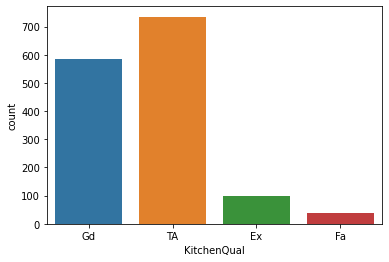

In [14]:
# R^2 is 0.626 which makes sense, because the better the quality the higher the price
## now let's take a look at an un-encoded categorical variable like the quality of the kitchen
sns.countplot(data["KitchenQual"])
plt.show()

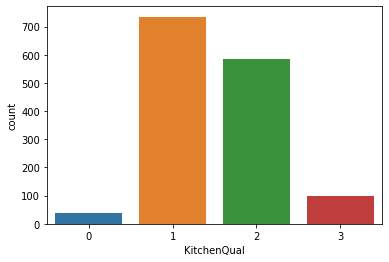

In [15]:
## now let's make a dict mapping the strings to corresponding numbers
## 0 for fair, 1 for typical or average, 2 for good and 3 for excellent
mapping = {"Fa": 0, "TA": 1, "Gd": 2, "Ex": 3}

## now let's use the map to change values in the series
kitchen_qual = data.copy()["KitchenQual"].map(mapping)

# plot it again
sns.countplot(kitchen_qual)
plt.show()

In [16]:
## let's calculate R^2
kitchen_qual.corr(price)**2
## not bad, not too good either.

0.435071791585331

### Problems
The problem with this method is that it only works with ordinal data or cyclic data after using cyclic encoding (to know all kinds of categorical encoding check [this notebook](https://www.kaggle.com/mahmoud1youssef/categorical-features-study))

what about nominal data? or what if I simply don't want to encode the data using ordinal encoding ?

Well, you can visualize it ... what I like to do in this case is use violin plots or box plots. let's see WTH violin plots are.  
[seaborn.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

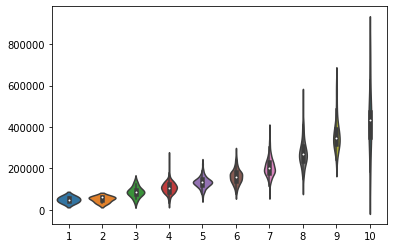

In [17]:
## Let's create one then explain
sns.violinplot(data["OverallQual"].values, data["SalePrice"].values)
plt.show()

The violin plot as you can see shows the distribution of the price on the y axis for each of the categories we give it, the distribution is mirrored for better visualization. Not only can we see that the price increases with the quality, we see that the relation is logarethmic-ish, let's fix that by changing the scale

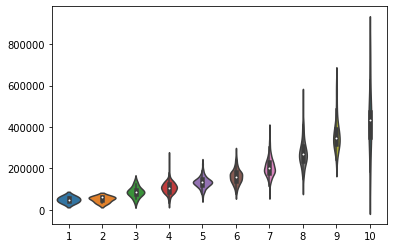

R^2: 0.625651892462117


In [18]:
quality = data["OverallQual"]
sns.violinplot(quality.values, price.values)
plt.show()

print("R^2:", np.corrcoef(quality.values, price.values)[0, 1]**2)

R^2 scaled: 0.6677903728939996


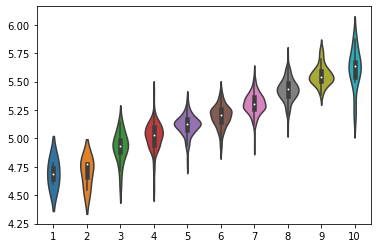

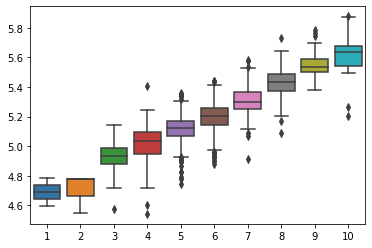

In [19]:
log_scale_price = np.log10(price.values)

print("R^2 scaled:", np.corrcoef(quality.values, log_scale_price)[0, 1]**2)

sns.violinplot(quality.values, log_scale_price)
plt.show()

## you can also plot boxes
sns.boxplot(quality.values, log_scale_price)
plt.show()

Now the plot is more clear and the R^2 value is a bit higher.

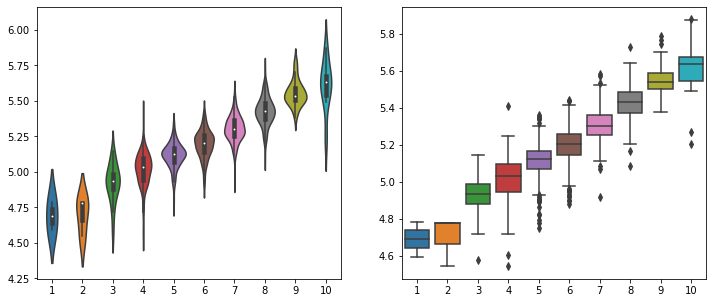

In [20]:
## plotting tricks ... subplots

# create subplots with 1 row and two columns and get the axis
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# make the axis an array 
ax = ax.flatten()

# make a violin plot on one axis
sns.violinplot(quality.values, log_scale_price, ax=ax[0])

# make a box plot on the other
sns.boxplot(quality.values, log_scale_price, ax=ax[1])

# show both
plt.show()

# The End ... or is it?

This is the end of this notebook, however, it is not the end of bivariate analysis. In the next notebook we'll continue with bivariate analysis when one of the variables is time aka __time series__ (evil echo in the background) .. I hope you found this one usefull and looking forward for your feedback.  
Happy learning :D